In [4]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display

**Preprocessing (Optional)**


In [2]:
def preprocess(image):
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    normalized_img = gray_img.astype(np.float32) / 255.0

    return normalized_img

**Mean Filtering (Linear)**

In [3]:
def mean_filtering(image, kernel_size):
    return cv2.blur(image, (kernel_size, kernel_size))


**Median Filtering (Non-linear)**

In [4]:
def median_filtering(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)


**Gaussian Filtering (Linear)**

In [5]:
def gaussian_filtering(image, kernel_size, sigma):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

**Non-local Means Filtering (Non-linear)**

In [6]:
def non_local_means_filtering(image, h_parameter=0.8, patch_size=7, patch_distance=11):
  # Use external library (e.g., scikit-image) for NLM filtering
  from skimage.restoration import denoise_nl_means
  # The parameter for search window size is called 'patch_distance' in denoise_nl_means
  return denoise_nl_means(image, h=h_parameter, patch_size=patch_size, patch_distance=patch_distance)

**Bilateral Filtering (Non-linear)**

In [7]:
def bilateral_filtering(image, diameter=9, sigma_color=75, sigma_space=75):
    return cv2.bilateralFilter(image, d=diameter, sigmaColor=sigma_color, sigmaSpace=sigma_space)

**Spatial Transformations**

In [8]:
def rotate_image(image, angle):
    # Get Image Dimension
    (h,w) = image.shape[:2]

    #Define rotation center
    center = (w//2,h//2)

    #Generate Rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    #Apply Rotation Transformation
    return cv2.warpAffine(image, rotation_matrix, (w,h))

def scale_image(image, scale_factor):
    return cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation = cv2.INTER_AREA)

def shear_image(image, dx, dy):
    """
    Shears an image along x and y axes.

    Args:
        image: The input image as a NumPy array.
        dx: The amount of shear along the x-axis (pixels).
        dy: The amount of shear along the y-axis (pixels).

    Returns:
        The sheared image as a NumPy array.
    """
    h, w = image.shape[:2]
    shear_matrix = np.float32([[1, dx/w, 0], [dy/h, 1, 0]])

    new_width = w + abs(dx)
    new_height = h + abs(dy)

    sheared_image = cv2.warpAffine(image, shear_matrix, (new_width, new_height))

    return sheared_image


**MAIN**    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 75800  100 75800    0     0   839k      0 --:--:-- --:--:-- --:--:--  860k


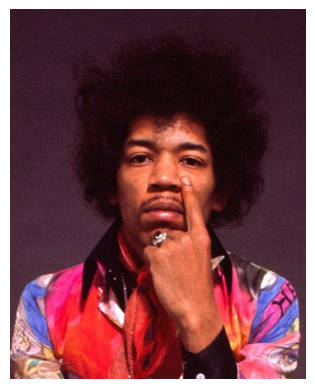

In [27]:
# !curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
!curl -o hendrix.jpg https://i.etsystatic.com/23861797/r/il/183b6d/3594587418/il_570xN.3594587418_fqp8.jpg

# # input_img = cv2.imread('logo.png')
input_img = cv2.imread('hendrix.jpg')
plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [28]:
# Preprocess the image (optional)
preprocessed_image = preprocess(input_img)

# Apply different filtering techniques and store the results in separate variables
mean_filtered_image = mean_filtering(preprocessed_image, kernel_size=5)
median_filtered_image = median_filtering(preprocessed_image, kernel_size=5)
gaussian_filtered_image = gaussian_filtering(preprocessed_image, kernel_size=5, sigma=1.0)
nlm_filtered_image = non_local_means_filtering(preprocessed_image)
bilateral_filtered_image = bilateral_filtering(preprocessed_image)

# Apply spatial transformations (optional)
rotated_image = rotate_image(input_img, angle=45)
scaled_image = scale_image(input_img, scale_factor=0.5)

# ... (add code for other spatial transformations)

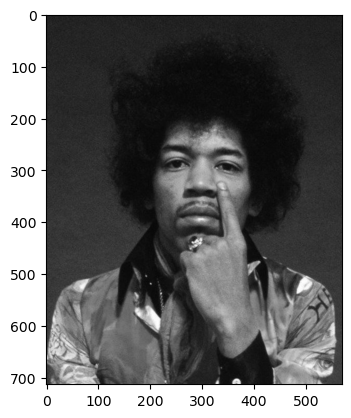

In [35]:
plt.imshow(cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB))

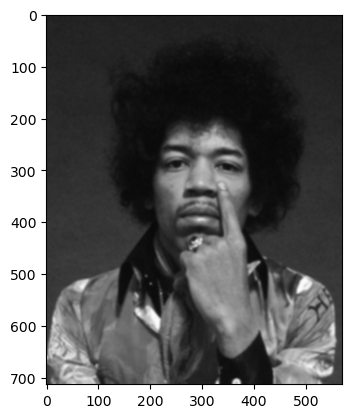

In [37]:
plt.imshow(cv2.cvtColor(mean_filtered_image, cv2.COLOR_BGR2RGB))

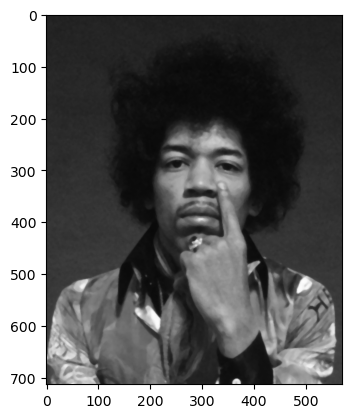

In [38]:
plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))

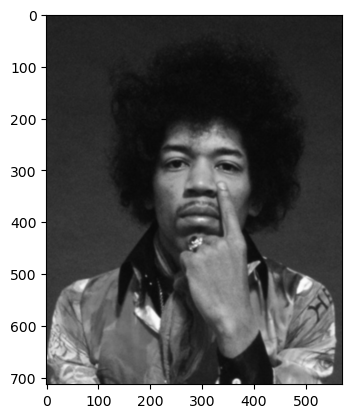

In [40]:
plt.imshow(cv2.cvtColor(gaussian_filtered_image, cv2.COLOR_BGR2RGB))

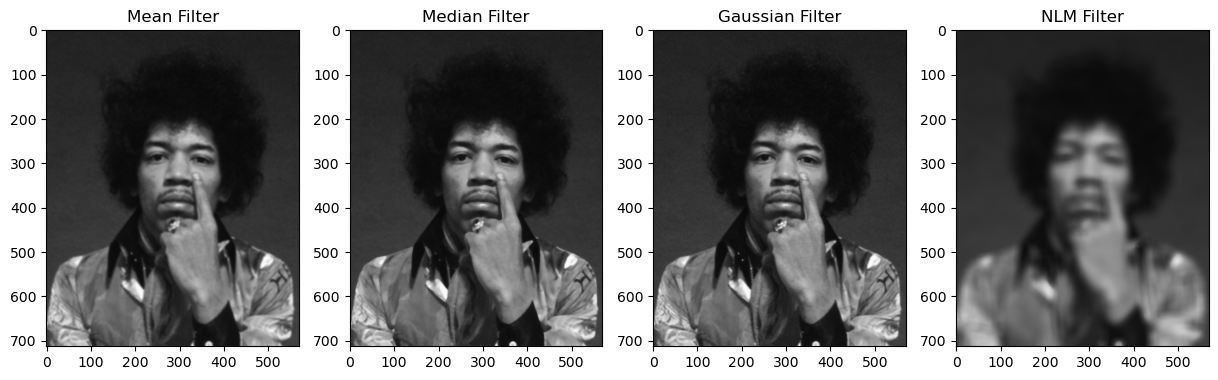

In [42]:
plt.figure(figsize=[15,10])
plt.subplot(141);plt.imshow(cv2.cvtColor(mean_filtered_image, cv2.COLOR_BGR2RGB));plt.title("Mean Filter")
plt.subplot(142);plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB));plt.title("Median Filter")
plt.subplot(143);plt.imshow(cv2.cvtColor(gaussian_filtered_image, cv2.COLOR_BGR2RGB));plt.title("Gaussian Filter")
plt.subplot(144);plt.imshow(cv2.cvtColor(nlm_filtered_image, cv2.COLOR_BGR2RGB));plt.title("NLM Filter")

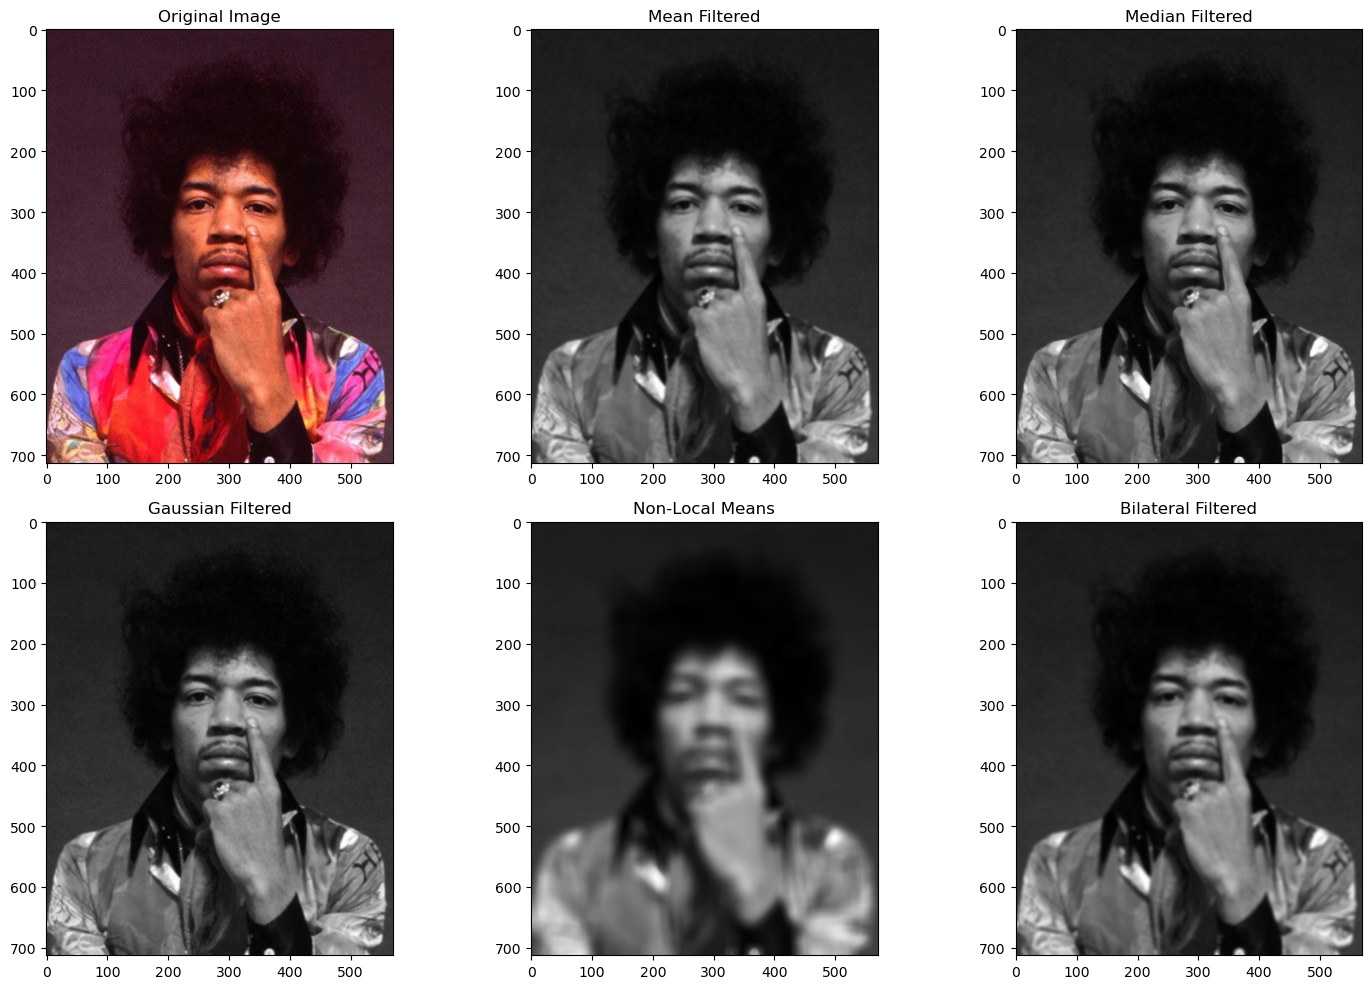

In [48]:
# Create a figure
plt.figure(figsize=(15, 10))

# Display original image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# Display mean filtered image
plt.subplot(2, 3, 2)
plt.imshow(mean_filtered_image, cmap='gray')
plt.title("Mean Filtered")

# Display median filtered image
plt.subplot(2, 3, 3)
plt.imshow(median_filtered_image, cmap='gray')
plt.title("Median Filtered")

# Display Gaussian filtered image
plt.subplot(2, 3, 4)
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title("Gaussian Filtered")

# Display Non-Local Means filtered image
plt.subplot(2, 3, 5)
plt.imshow(nlm_filtered_image, cmap='gray')
plt.title("Non-Local Means")

# Display bilateral filtered image
plt.subplot(2, 3, 6)
plt.imshow(bilateral_filtered_image, cmap='gray')
plt.title("Bilateral Filtered")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [52]:
def final_result(image):

    input_img = cv2.imread(image)
    # Preprocess the image (optional)
    preprocessed_image = preprocess(input_img)

    # Apply different filtering techniques and store the results in separate variables
    mean_filtered_image = mean_filtering(preprocessed_image, kernel_size=5)
    median_filtered_image = median_filtering(preprocessed_image, kernel_size=5)
    gaussian_filtered_image = gaussian_filtering(preprocessed_image, kernel_size=5, sigma=1.0)
    nlm_filtered_image = non_local_means_filtering(preprocessed_image)
    bilateral_filtered_image = bilateral_filtering(preprocessed_image)

    # Apply spatial transformations (optional)
    rotated_image = rotate_image(input_img, angle=45)
    scaled_image = scale_image(input_img, scale_factor=0.5)

    # ... (add code for other spatial transformations)


    # Create a figure
    plt.figure(figsize=(15, 10))

    # Display original image
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")

    # Display mean filtered image
    plt.subplot(2, 3, 2)
    plt.imshow(mean_filtered_image, cmap='gray')
    plt.title("Mean Filtered")

    # Display median filtered image
    plt.subplot(2, 3, 3)
    plt.imshow(median_filtered_image, cmap='gray')
    plt.title("Median Filtered")

    # Display Gaussian filtered image
    plt.subplot(2, 3, 4)
    plt.imshow(gaussian_filtered_image, cmap='gray')
    plt.title("Gaussian Filtered")

    # Display Non-Local Means filtered image
    plt.subplot(2, 3, 5)
    plt.imshow(nlm_filtered_image, cmap='gray')
    plt.title("Non-Local Means")

    # Display bilateral filtered image
    plt.subplot(2, 3, 6)
    plt.imshow(bilateral_filtered_image, cmap='gray')
    plt.title("Bilateral Filtered")

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

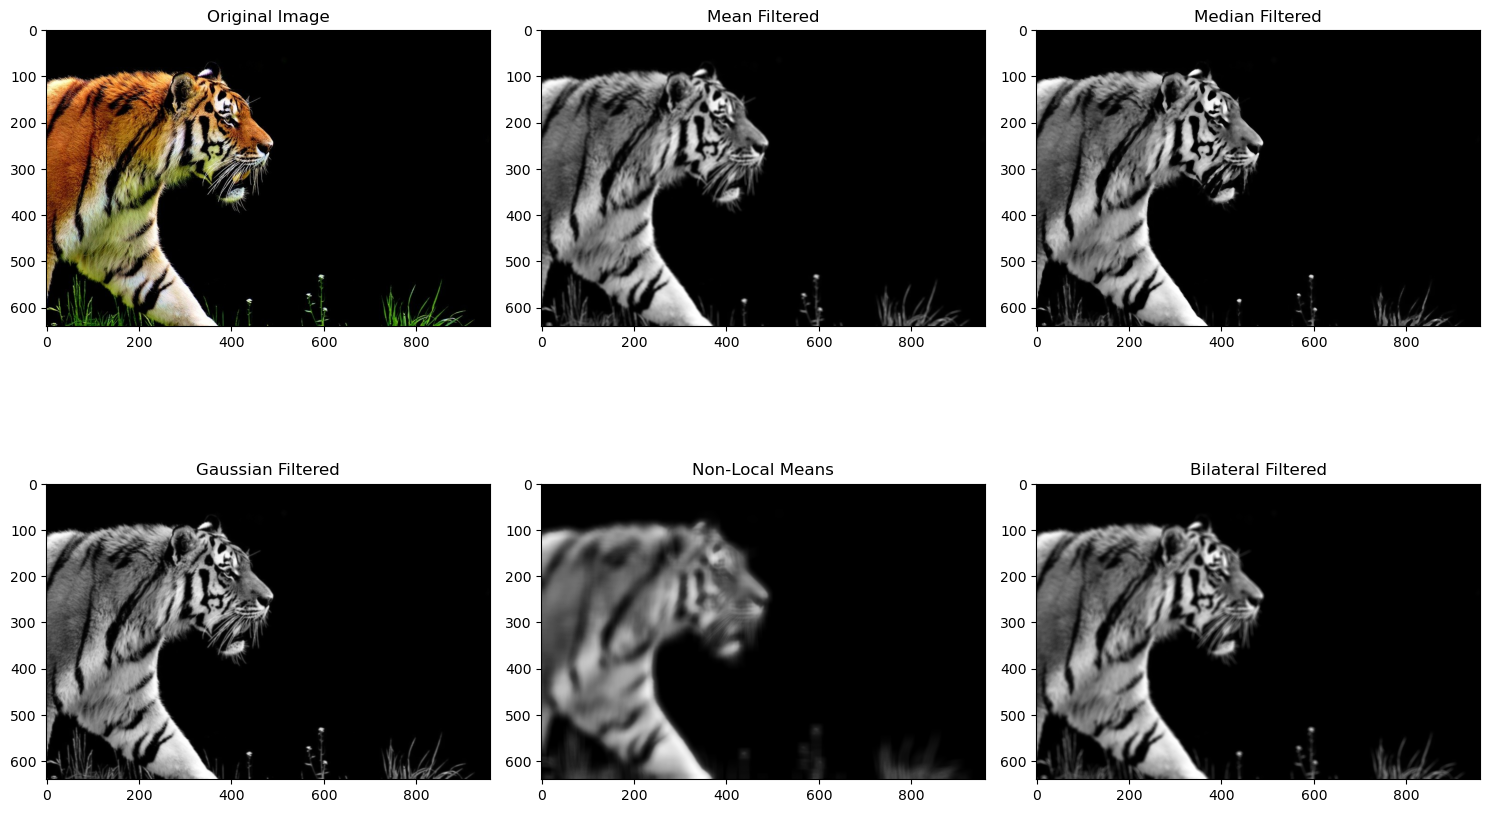

In [54]:
final_result('test.jpg')

In [55]:
print("Done")

Done
